# Module 01: Jupyter Notebook Assignment

## Due: 2021-09-03

## Name: 

### Part I: Instructions

In this part of the assignment, your task is to create a one-dimensional random walk model similar to the one in [the example notebook](./mod01-PythonIntro-1.ipynb) with the following parameters:

* `Nt` = 200
* `mu_x` = 1.5
* `s_x` = 2.1
* `min_x` = 1.25

Where `min_x` is a new parameter that is the _minimum step size_ at each step in the random walk. When you calculate the step size at each step, you will only accept values that are larger than `min_x` by using a `while` loop to keep generating step sizes until the step size exceeds `min_x`. Do this for `Nx` = 1,000 random walkers. 

___Deliverables:___ 

1. Code to create the random walk with comments
2. Reproduce the 2 figures in section 5.1 and 5.2 of the example notebook (__Note__: you will have to adjust the `bins` and `range` parameters provided to histogram). 

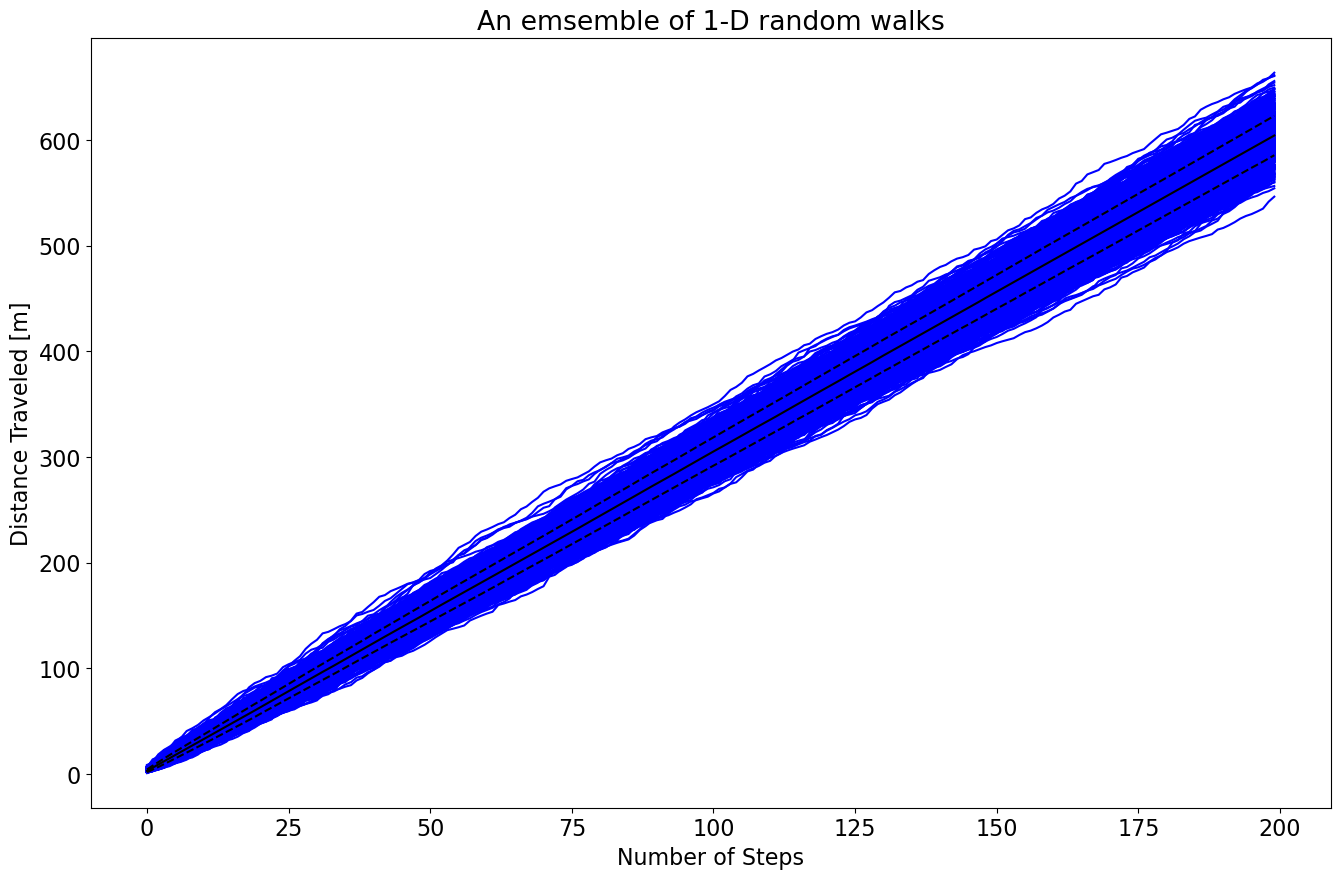

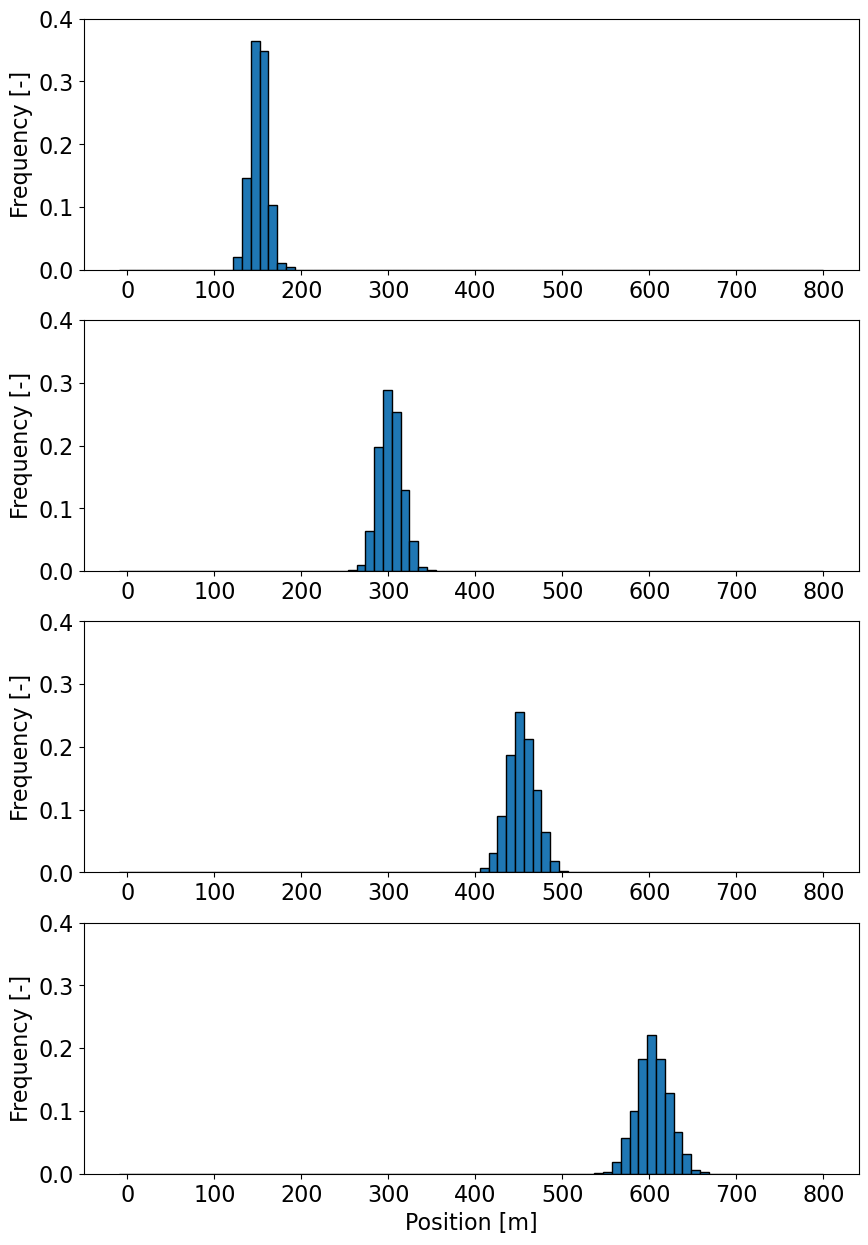

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Nt = 200
Nx = 1000

mu_x = 1.5
s_x = 2.1
min_x = 1.25
min_y = 1.25

X = np.zeros((Nt,Nx))

# Similar to the single walker, create a loop for each time step.
for i in np.arange(Nt):

    # The foor loop below loops through each walker. It is 'nested' within the 
    # time for loop
    for j in np.arange(Nx):
        
        x_i = 1
        
        while (x_i < min_x): 
        # Creates random number with mean = 0, standard deviation = 1 which we use for random step size

        # Calculate the random step size for the j^th walker at the i^th time step (j could also be places in space)
            x_i = s_x*np.random.randn() + mu_x
    
        # Again check to see if we're at the first time step
        if(i==0):
            # If at the first time step, the initial position was 0
            X[i,j] = 0.0 + x_i 
        else:
            # If at a subsequent time step, the initial position was the position at the previous time step
            X[i,j] = X[i-1,j] + x_i 
            
# Just to underscore X[26,156] corresponds to the 27th time step and the 157th walker because 
# Python arrays are zero-based (i.e., the first element is 0).

plt.rcParams.update({'font.size': 16}) #sets all font size for figures to 16

mean_X = np.mean(X,axis=1) # Calculate the average distance of all walkers through time
std_X = np.std(X,axis=1) # Calculate the standard deviation of all walkers through time

plt.figure(figsize=(16,10)) #create a new figure 16"x10"

plt.plot(np.arange(Nt),X,'b-') #array of standard walks as blue lines 
plt.plot(np.arange(Nt),mean_X,'k-') #mean of all walks and as a black line
plt.plot(np.arange(Nt),mean_X + std_X, 'k--') #mean + standard deviation as a black dased line
plt.plot(np.arange(Nt),mean_X - std_X, 'k--') #mean - standard deviation as a black dased line
plt.xlabel('Number of Steps') #x-axis label
plt.ylabel('Distance Traveled [m]') #y-axis label
plt.title('An emsemble of 1-D random walks')

x_50, be_50 = np.histogram(X[49,:], bins=80, range=(-10.0,800) )
# .histogram(array_like(input data), bins=(#of bins), range=(upper and lower range of bins))
x_100, be_100 = np.histogram(X[99,:], bins=80, range=(-10.0,800) )
# .histogram(array_like(input data), bins=(#of bins), range=(upper and lower range of bins))
x_150, be_150 = np.histogram(X[149,:], bins=80, range=(-10.0,800) )
# .histogram(array_like(input data), bins=(#of bins), range=(upper and lower range of bins))
x_200, be_200 = np.histogram(X[-1,:], bins=80, range=(-10.0,800) )
# .histogram(array_like(input data), bins=(#of bins), range=(upper and lower range of bins))

plt.figure(figsize=(10,15)) #create a new figure 10"x15"
plt.subplot(4,1,1) #Create a subplot that is 4 rows x 1 column and call the first plot
plt.bar((be_50[1:]+be_50[:-1])/2, (x_50/np.sum(x_50)), width=(be_50[1]-be_50[0]), edgecolor='black') 
# creation of bar plot,bar(x, height, width=) 
plt.ylim((0.0,0.4)) # limits on the y-axis
plt.ylabel('Frequency [-]') # y-axis label

plt.subplot(4,1,2) #Create a subplot that is 4 rows x 1 column and call the second plot
plt.bar((be_100[1:]+be_100[:-1])/2, (x_100/np.sum(x_100)), width=(be_100[1]-be_100[0]), edgecolor='black')
# creation of bar plot,bar(x, height, width=) 
plt.ylim((0.0,0.4)) # limits on the y-axis
plt.ylabel('Frequency [-]') # y-axis label

plt.subplot(4,1,3) #Create a subplot that is 4 rows x 1 column and call the third plot
plt.bar((be_150[1:]+be_150[:-1])/2, (x_150/np.sum(x_150)), width=(be_150[1]-be_150[0]), edgecolor='black')
# creation of bar plot,bar(x, height, width=) 
plt.ylim((0.0,0.4)) # limits on the y-axis
plt.ylabel('Frequency [-]') # y-axis label

plt.subplot(4,1,4) #Create a subplot that is 4 rows x 1 column and call the forth plot
plt.bar((be_200[1:]+be_200[:-1])/2, (x_200/np.sum(x_200)), width=(be_200[1]-be_200[0]), edgecolor='black')
# creation of bar plot,bar(x, height, width=) 
plt.ylim((0.0,0.4)) # limits on the y-axis
plt.xlabel('Position [m]') # x-axis label
plt.ylabel('Frequency [-]') # y-axis label

plt.savefig('fig1.png')

plt.show()



### Part II: Instructions

In this part of the assignment, your task is to create a __two-dimensional__ random walk model. The 2-D random walk is just an extension of the 1-D random walk into a second dimension. Assume that at each step in the random walk, the step size in the x- and y-directions are _independent_ of one another. That is, you do not need to know anything about the step size in the x-direction to calculate the step size in the y-direction and vice versa. Use the following parameters:

* Nt = 300
* Nx = 3
* mu_x = 0.5
* s_x = 1.5
* mu_y = 5.0
* s_y = 2.5

Where `mu_y` and `s_y` are, respectively, the average and standard deviation of the step size in the y-direction.

___Deliverables___

1. Code to create the random walk with comments
2. Plot the position of all three random walkers at each step of their respective random walks on the ___same plot___.

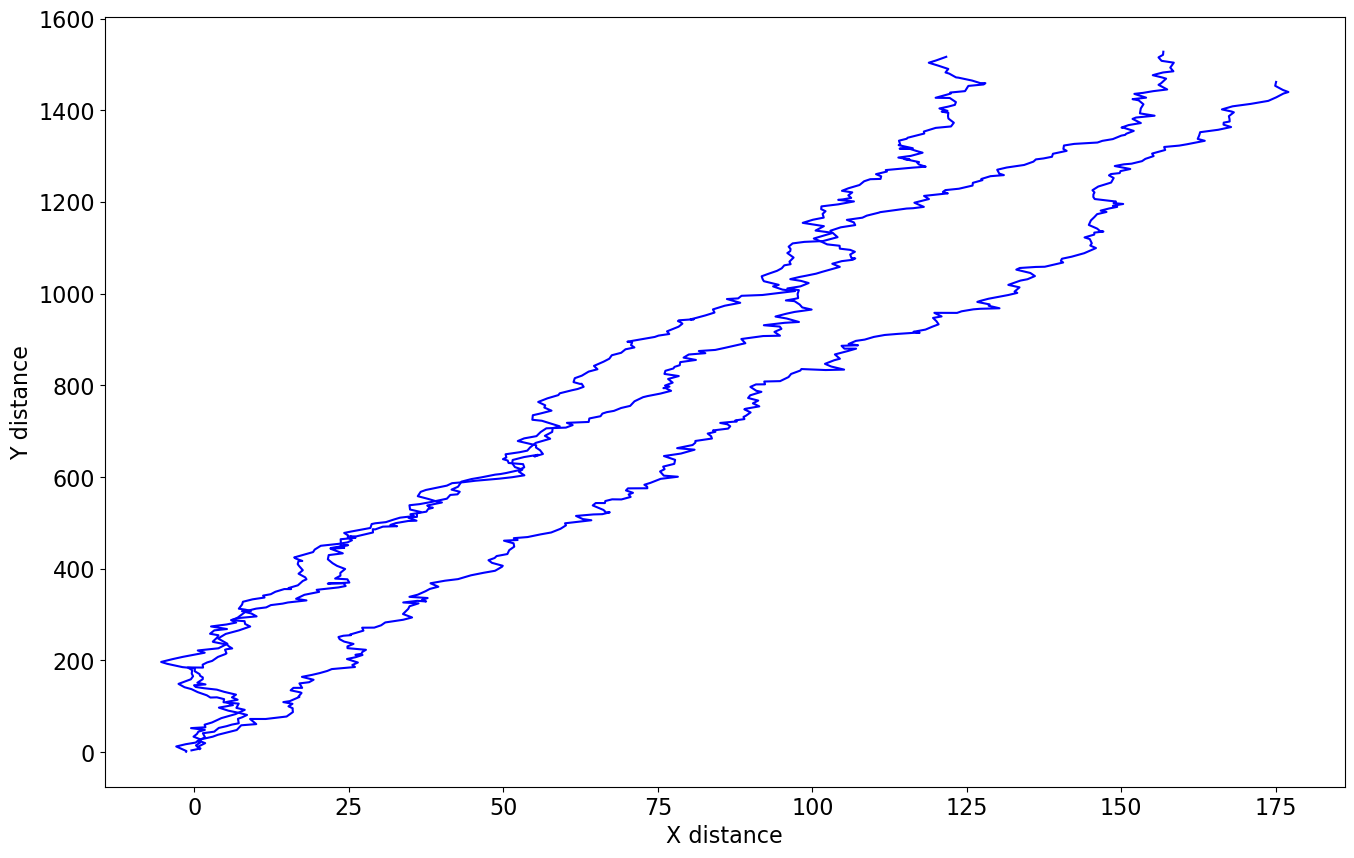

In [2]:
Nt = 300 # number os steps
Nx = 3 # number of walkers

mu_x = 0.5 # average step in the x direction
s_x = 1.5 # stardard deviation of the step in the x direction
mu_y = 5.0 # average step in the y direction
s_y = 2.5 # stardard deviation of the step in the y direction

X = np.zeros((Nt,Nx))
Y = np.zeros((Nt,Nx))

# Similar to the single walker, create a loop for each time step.
for i in np.arange(Nt):

    # The foor loop below loops through each walker. It is 'nested' within the 
    # time for loop
    for j in np.arange(Nx):
        
#        x_i = 1
#        y_i = 1
        
#        while (x_i < min_x):
#              (y_i < min_y)

        # Calculate the random step size for the j^th walker at the i^th time step
        x_i = s_x*np.random.randn() + mu_x
        y_i = s_y*np.random.randn() + mu_y
        
        
        # Again check to see if we're at the first time step
        if(i==0):
            # If at the first time step, the initial position was 0
            X[i,j] = 0.0 + x_i 
            Y[i,j] = 0.0 + y_i 
        else:
            # If at a subsequent time step, the initial position was the position at the previous time step
            X[i,j] = X[i-1,j] + x_i
            Y[i,j] = Y[i-1,j] + y_i
            

plt.rcParams.update({'font.size': 16}) #sets all font size for figures to 16            
            
plt.figure(figsize=(16,10)) # Create a figure and make it 16" wide x 10" tall
plt.plot(X,Y,'b-') # Plot x vs i (created using np.arange(Nt)) as a blue line
plt.xlabel('X distance') # Label distance traveled
plt.ylabel('Y distance') # Label distance traveled

plt.show()

# is this right?